# Circle Drawing Algorithms

 **Circle Equation**: 
   For any point (x, y) on the circle centered at $(x_{center}  \ , y_{center})$ with radius `r`:  
   
   $x^2 + y^2 = (x_{center} - r)^2 + (y_{center} - r)^2$


In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


def draw(all_x, all_y, size=70, log=False):  # function for grid plotting
    # Find the min and max values to determine grid size and offset
    min_x = min(all_x)
    max_x = max(all_x)
    min_y = min(all_y)
    max_y = max(all_y)

    # Calculate the offset to handle negative coordinates
    x_offset = -min_x
    y_offset = -min_y

    # Determine the grid dimensions
    grid_width = max_x - min_x + 1
    grid_height = max_y - min_y + 1

    # Create an empty grid (e.g., filled with zeros or ones)
    grid = np.zeros(
        (grid_height, grid_width), dtype=int
    )  # Use zeros to indicate no point initially

    # Fill the grid with points
    for i in range(len(all_x)):
        # Apply the offset to get the correct grid index
        grid_x = all_x[i] + x_offset
        grid_y = all_y[i] + y_offset

        # Set the value at the corresponding grid index (e.g., to 1)
        grid[grid_y, grid_x] = 1  # Note: imshow displays rows as y and columns as x

    plt.figure(figsize=(8, 8), dpi=size)
    plt.imshow(
        grid,
        cmap="gray_r",
        origin="lower",
        extent=[min_x - 0.5, max_x + 0.5, min_y - 0.5, max_y + 0.5],
    )  # Set extent

    plt.title("Points on a Grid")
    plt.plot([0, 0], [min_y, max_y])
    plt.plot([min_x, max_x], [0, 0])
    plt.plot([min_x, max_x], [min_y, max_y])
    plt.plot([min_x, max_x], [max_y, min_y])
    plt.xlabel("X-axis (offset)")
    plt.ylabel("Y-axis (offset)")
    plt.show()

---
## Bresenham's Circle Generation Algorithm

#### Here is a step-by-step breakdown of Bresenham's Circle Algorithm −

- Step 1 − Start the algorithm
- Step 2 − Declare variables: $p, q$ (circle centre coordinates), $x, y$ (current point), $r$ (radius), $d$ (decision variable)
- Step 3 − Input the radius $r$
- Step 4 − Calculate initial $d_0: d_0 = 3 - 2r$
- Step 5 − Set initial $x = 0, y = r$
- Step 6 − Check if $x>=y$. If true, stop. If false, continue
- Step 7 − Plot eight symmetric points
- Step 8 − Update $d$ and $x$ (and y if needed)
- Step 9 − Go back to step 6
- Step 10 − End the algorithm

In [2]:
def draw_circle(r):
    x = 0
    y = r
    d = 3 - 2 * r
    xl, yl = [], []
    a, b = [], []
    while x <= y:
        a.append(x)
        b.append(y)
        xl.extend([x, -x, x, -x, y, -y, y, -y])
        yl.extend([y, y, -y, -y, x, x, -x, -x])
        print(f"({x}, {y})")
        if d < 0:
            d = d + 4 * x + 6
        else:
            d = d + 4 * (x - y) + 10
            y -= 1
        x += 1
    return xl, yl, a, b

(0, 10)
(1, 10)
(2, 10)
(3, 10)
(4, 9)
(5, 9)
(6, 8)
(7, 7)
[0, 0, 0, 0, 10, -10, 10, -10, 1, -1, 1, -1, 10, -10, 10, -10, 2, -2, 2, -2, 10, -10, 10, -10, 3, -3, 3, -3, 10, -10, 10, -10, 4, -4, 4, -4, 9, -9, 9, -9, 5, -5, 5, -5, 9, -9, 9, -9, 6, -6, 6, -6, 8, -8, 8, -8, 7, -7, 7, -7, 7, -7, 7, -7]
[10, 10, -10, -10, 0, 0, 0, 0, 10, 10, -10, -10, 1, 1, -1, -1, 10, 10, -10, -10, 2, 2, -2, -2, 10, 10, -10, -10, 3, 3, -3, -3, 9, 9, -9, -9, 4, 4, -4, -4, 9, 9, -9, -9, 5, 5, -5, -5, 8, 8, -8, -8, 6, 6, -6, -6, 7, 7, -7, -7, 7, 7, -7, -7]


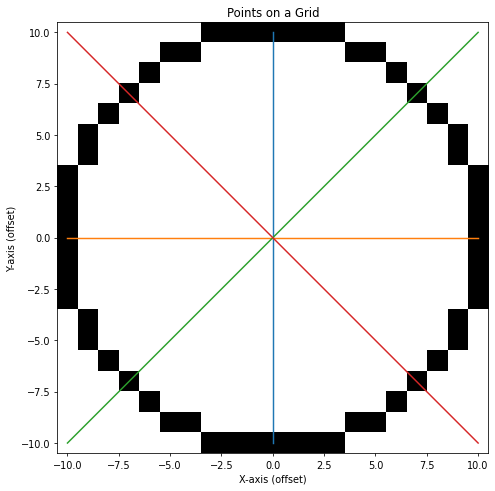

In [3]:
x, y, a, b = draw_circle(10)

print(x)
print(y)
draw(x, y)

##  Midpoint Circle Drawing Algorithm

For any given pixel $(x, y)$, the next pixel to be plotted is either $(x, y+1)$ or $(x-1, y+1)$. This can be decided by following the steps below.  

* Find the mid-point `p` of the two possible pixels $i.e (x-0.5, y+1)$
* If $p$ lies inside or on the circle perimeter, we plot the pixel $(x, y+1)$, otherwise if it's outside we plot the pixel $(x-1, y+1)$




In [4]:
def midpoint(x_center, y_center, radius):
    f = 1 - radius
    ddF_x = 1
    ddF_y = -2 * radius
    x = 0
    y = radius
    xl, yl = [0], [radius]
    while x < y:
        # Draw pixel at (x_center + x, y_center + y)
        # Draw pixel at (x_center + x, y_center - y)
        # Draw pixel at (x_center - x, y_center + y)
        # Draw pixel at (x_center - x, y_center - y)
        if f > 0:
            y -= 1
            f += ddF_y
            ddF_y += 2

        x += 1
        f += ddF_x
        ddF_x += 2
        xl.append(x), yl.append(y)
    print(xl, yl, sep="\n")
    return xl, yl

6.708203932499369
[0, 1, 2, 3, 4, 5]
[6, 6, 6, 6, 5, 5]


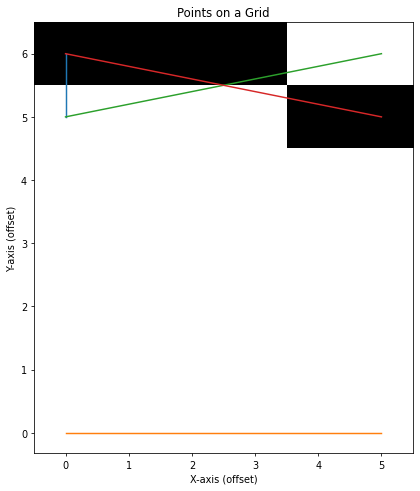

In [5]:
x1, y1 = 2, 2
x2, y2 = 8, 5
radius = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
print(radius)
x, y = midpoint(x1, y1, int(radius))
draw(x, y, log=True)

i think i should just provide raduis and tahe the center as (0,0)  
because during drawing we have to shift it to center .. then translate back to its original position

[0, 1, 2, 3, 4, 5]
[6, 6, 6, 6, 5, 5]


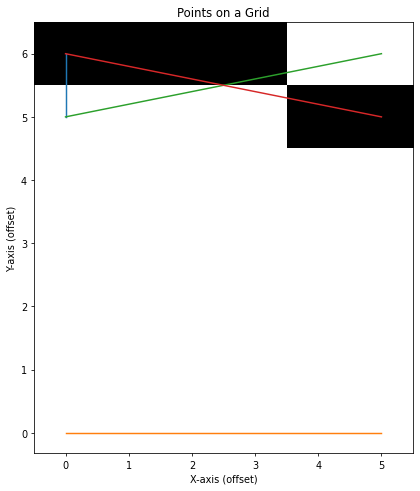

In [6]:
r = 6
x, y = midpoint(0, 0, r)
draw(x, y)

12 12
[0, 1, 2, 3, 4, 5, 6, 6, 6, 6, 5, 5] [6, 6, 6, 6, 5, 5, 0, 1, 2, 3, 4, 5]


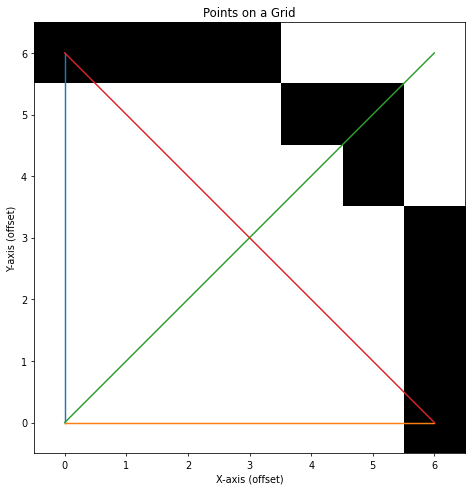

In [7]:
xall = x + y
yall = y + x
print(len(xall), len(yall))
print(xall, yall)
draw(xall, yall)